<a href="https://colab.research.google.com/github/bkp5190/TensorFlow/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks** 

*   Each input data is associated with an input "neuron"
*   There are multiple hidden layers between input and output
*   Called hidden because they are not observed
*   Output data classification sum is equal to 1
*   Gives an overall probability distribution



# **Layers** 

*   Layers are connected by "weights"
*   Densely connected layers are when every node is connected to node in previous layer
*   Weights are changed and optimized/trained
*   Typically wight values are between [0,1]
*   Bias is present in previous layer to the one it affects and connects to each neuron in the next layer
*   Bias does not take any input and is another trainable parameter
*   Bias weights typically 1


# **Activation Function**



*   Function ran before final output layer to normalize data into some form
*   Tanh
*   Sigmoid
*   Etc.





# **Loss/Cost Function**

*   Calculates how far away given output from network is from expected output
*   Mean Squared Error
*   Mean Absolute Error
*   Hinge Loss




# **Gradient Descent**



*   Algorithm used to find optimal parameters (wieghts and biases for network)
*   Optimization by moving towards the steepest descent as defined by the gradient to global minimum
*   Gradient is direction we need to move to minimize loss function



# **Backpropagation**

*   Stepping back through the neural network after a run through with new values
*   Update weights and biases according to the gradient descent algorithm



# **Optimizer**

*   Function that implements the backpropagation algorithm
*   Gradient Descent
*   Stochastic Gradient Descent
*   Mini-Batch Gradient Descent
*   Momentum
*   Nesterov Accelerated Gradient




In [2]:
# Import statements
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Using a fashion dataset provided by keras
fashion_mnist = keras.datasets.fashion_mnist

# Split data into test/train
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# 60,000 images for training and 10,000 images for testing
train_images.shape
test_images.shape

(10000, 28, 28)

In [5]:
# Represents one pixel which has a value [0, 255] grayscale
train_images[0, 23, 23]

194

In [6]:
# Shows the last 10 labels of the data
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
# Since there are 9 labels, we need 9 class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

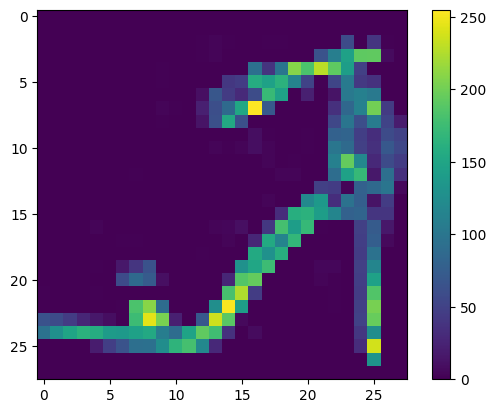

In [8]:
# Show one of the images
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Data preprocessing
# Scale all pixels between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
# Building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
# Compile the model
model.compile(optimizer='adam', # gradient descent algo
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # output metrics

In [12]:
# Fit the model over 10 epochs with the training data
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.5034 - accuracy: 0.8229


In [13]:
# Test the model on new test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)
# Overfit since the test data accuracy < training data accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.8387
Test accuracy: 0.838699996471405


313/313 [==============================] - 1s 2ms/step
1


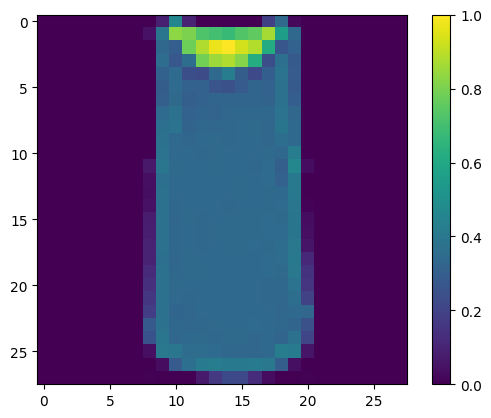

In [14]:
predictions = model.predict(test_images)
print(np.argmax(predictions[2]))
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 40
1/1 [==============================] - 0s 21ms/step


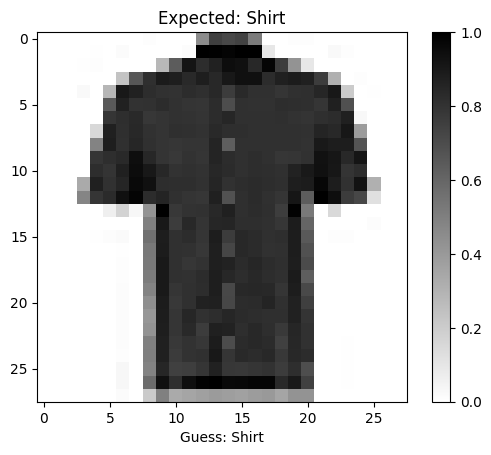

In [20]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(image, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
      else:
        print("Try again")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)